Assessment-2 Brief 
This assignment is divided into two sections 
Given a dataset/s, the students are required to analyse dataset. The students should clearly mention all the steps undertaken from importing data, cleaning, preparing data, and analysing data. The students should provide appropriate visualisation/s and report the results of analysis. All the steps/Python code/results must be shared. 
(A) Data Analysis (75%) 
- • On given datasets, identify the questions that you would like to answer through data analysis. 
- • Given two datasets, use SQL queries to create a new dataset for analysis. 
- • Perform data cleaning and pre-processing tasks on the new dataset. 
- • Use HIVE, MapReduce (or Spark) and machine learning techniques to analyse data. 
- • Perform visualization using Python and PowerBI and report the results. 

Questions: 
- Most rated brand, 
- Top rated product by price. 
- Top rated product by brand. 
- Top rated product by color. 
- Products without zero rating. 
- Words mostly used in descrioption. 
- Product without description. 
- Which product should it focus on?

# Importing some of the neccessary libraries or packages

In [1]:
#Importing some of the neccessary libraries or packages that will assist us in our data manipulations

import pandas as pd #for data manipulation with dataframe table
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import numpy as np #for numerical manipulation
from nltk.corpus import stopwords #for data cleaning

from collections import Counter #for word processing
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #for word cloud 
from textblob import TextBlob # for sentiment analysis and word processing

from sklearn.metrics.pairwise import linear_kernel
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
%matplotlib inline

C:\Users\Public\DSNanaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Explanatory Data Analysis

In [2]:
df   = pd.read_csv('fashiondataset.csv') 
df.head()

,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes
0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.548827,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'..."
1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.313255,"Mustard yellow solid sweatshirt, has a hood, t...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.068966,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt..."
3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,SASSAFRAS,9124.0,4.147523,"Black solid woven high-rise parallel trousers,...","{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod..."
4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260.0,4.078467,"Black dark wash 4-pocket high-rise jeans, clea...","{'Add-Ons': 'NA', 'Brand Fit Name': 'NA', 'Clo..."


In [3]:
df.tail()

,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes
14324,17029604.0,The Chennai Silks Pink & Silver-Toned Floral Z...,3999.0,Pink,The Chennai Silks,NaN,NaN,<b>Design Details </b><ul><li>Pink and silver-...,"{'Better Cotton Initiative': 'Regular', 'Blous..."
14325,17600212.0,Kinder Kids Girls Blue & Green Printed Foil Pr...,2050.0,Blue,Kinder Kids,NaN,NaN,"Blue and green printed lehenga choli, has foi...","{'Blouse Closure': 'NA', 'Blouse Fabric': 'Cot..."
14326,18159266.0,KLOTTHE Women Green & Black Floral Printed Pal...,1659.0,Green,KLOTTHE,NaN,NaN,<ul> <li> Green and black woven palazzos </li>...,{'Body or Garment Size': 'To-Fit Denotes Body ...
14327,18921114.0,InWeave Women Red Printed A-Line Skirt,2399.0,Red,InWeave,NaN,NaN,"<p>Red printed A-line skirt, has drawstring cl...","{'Add-Ons': 'NA', 'Body Shape ID': '324,333,42..."
14328,19361058.0,BoStreet Women Navy Blue Tapered Fit Trousers,2599.0,Navy Blue,BoStreet,NaN,NaN,<ul> <li> Navy blue knitted trousers </li> <li...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,42..."


In [4]:
df2   = pd.read_csv('fashion_brand_details.csv') 
df2

,brand_id,brand_name
0,1,513
1,2,109F
2,3,20Dresses
3,4,250 Designs
4,5,3Pin
...,...,...
1015,1016,Ziva Fashion
1016,1017,Zivame
1017,1018,Ziyaa
1018,1019,Zoella


combine = [df, df2]
combine

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14329 entries, 0 to 14328
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   p_id          14311 non-null  float64
 1   name          14310 non-null  object 
 2   price         14310 non-null  float64
 3   colour        14307 non-null  object 
 4   brand         14305 non-null  object 
 5   ratingCount   6581 non-null   float64
 6   avg_rating    6581 non-null   float64
 7   description   14310 non-null  object 
 8   p_attributes  14310 non-null  object 
dtypes: float64(4), object(5)
memory usage: 1007.6+ KB


In [6]:
df.describe()

,p_id,price,ratingCount,avg_rating
count,1.431100e+04,14310.000000,6581.000000,6581.000000
mean,1.569129e+07,2964.168484,184.479410,4.101226
std,3.153525e+06,2564.014851,782.501137,0.475633
min,7.016600e+04,169.000000,1.000000,1.000000
25%,1.413618e+07,1599.000000,9.000000,3.888889
50%,1.638217e+07,2200.000000,23.000000,4.180822
75%,1.808452e+07,3495.000000,80.000000,4.392857
max,1.941576e+07,47999.000000,21274.000000,5.000000


In [7]:
#finding sum of missing values for each column
df.isnull().sum()

p_id              18
name              19
price             19
colour            22
brand             24
ratingCount     7748
avg_rating      7748
description       19
p_attributes      19
dtype: int64

# Dataset Cleaning and Preprocessing

In [8]:
ratingC = df.ratingCount.dropna().mode()[0]
ratingC

for dataset in df:
    df['ratingCount'] = df['ratingCount'].fillna(ratingC)
    
    
avg_R = df.avg_rating.dropna().mode()[0]
avg_R

for dataset in df:
    df['avg_rating'] = df['avg_rating'].fillna(avg_R)
    

In [9]:
#sample view of the output
colour_R = df.colour.dropna().mode()[0]
colour_R

'Black'

In [10]:
for dataset in df:
    df['colour'] = df['colour'].fillna(avg_R)

In [11]:
df.shape

(14329, 9)

In [12]:
df.dropna()

,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes
0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.548827,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'..."
1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.313255,"Mustard yellow solid sweatshirt, has a hood, t...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.068966,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt..."
3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,SASSAFRAS,9124.0,4.147523,"Black solid woven high-rise parallel trousers,...","{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod..."
4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260.0,4.078467,"Black dark wash 4-pocket high-rise jeans, clea...","{'Add-Ons': 'NA', 'Brand Fit Name': 'NA', 'Clo..."
...,...,...,...,...,...,...,...,...,...
14324,17029604.0,The Chennai Silks Pink & Silver-Toned Floral Z...,3999.0,Pink,The Chennai Silks,5.0,4.000000,<b>Design Details </b><ul><li>Pink and silver-...,"{'Better Cotton Initiative': 'Regular', 'Blous..."
14325,17600212.0,Kinder Kids Girls Blue & Green Printed Foil Pr...,2050.0,Blue,Kinder Kids,5.0,4.000000,"Blue and green printed lehenga choli, has foi...","{'Blouse Closure': 'NA', 'Blouse Fabric': 'Cot..."
14326,18159266.0,KLOTTHE Women Green & Black Floral Printed Pal...,1659.0,Green,KLOTTHE,5.0,4.000000,<ul> <li> Green and black woven palazzos </li>...,{'Body or Garment Size': 'To-Fit Denotes Body ...
14327,18921114.0,InWeave Women Red Printed A-Line Skirt,2399.0,Red,InWeave,5.0,4.000000,"<p>Red printed A-line skirt, has drawstring cl...","{'Add-Ons': 'NA', 'Body Shape ID': '324,333,42..."


# Finding the shape of the dataset

In [13]:
df.shape

(14329, 9)

In [14]:
df.head()

,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes
0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.548827,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'..."
1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.313255,"Mustard yellow solid sweatshirt, has a hood, t...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.068966,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt..."
3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,SASSAFRAS,9124.0,4.147523,"Black solid woven high-rise parallel trousers,...","{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod..."
4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260.0,4.078467,"Black dark wash 4-pocket high-rise jeans, clea...","{'Add-Ons': 'NA', 'Brand Fit Name': 'NA', 'Clo..."


# Finding missing values for each column

In [15]:
#finding % of missing values for each column
df.isnull().sum()

p_id            18
name            19
price           19
colour           0
brand           24
ratingCount      0
avg_rating       0
description     19
p_attributes    19
dtype: int64

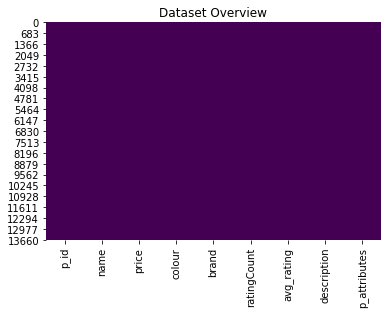

In [16]:
#To visualize missing or null values in the dataset

#import seaborn as sns
sns.heatmap(df.isnull(),cbar=False, cmap="viridis").set_title("Dataset Overview")
plt.show()

# Finding the total number of fashion items in the dataset

In [17]:
#Find the total number of fashion items in the dataset

print('total_Item =', len(df))

total_Item = 14329


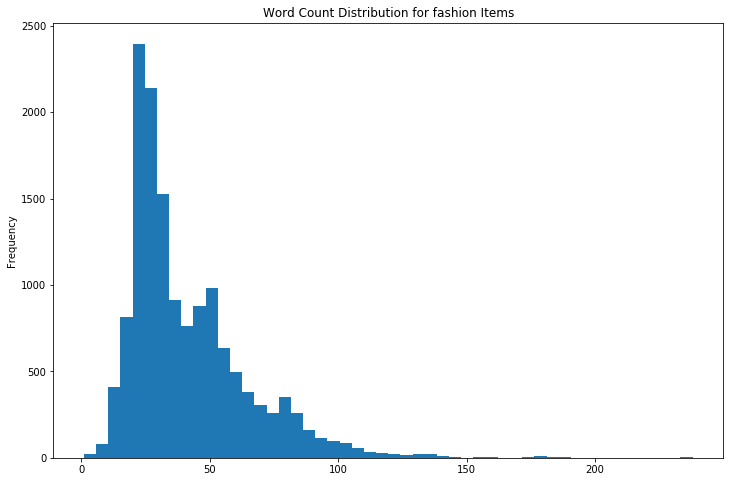

In [18]:
# Calculating the word count for fashion name description

df['word_count'] = df['description'].apply(lambda x: len(str(x).split()))# Plotting the word count
df['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for fashion Items')

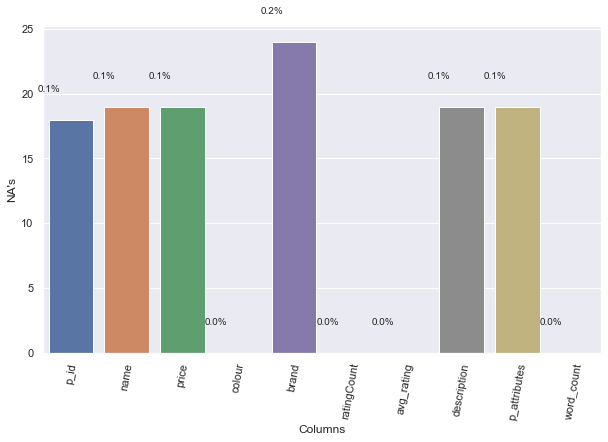

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
x = df.columns
y = df.isnull().sum()
plt.figure(figsize=(10,6))
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(),
            height + 2,
            str(100*round(int(height)/df.shape[0], 3)) +"%",
            fontsize=10, ha='center', va='bottom')
ax.set_xlabel("Columns")
ax.set_ylabel("NA's")
plt.xticks(rotation=80)

plt.show()

# Data Cleaning 

In [20]:
#Cleaning the the category and tags column
def clean_data(x):
        if isinstance(x, list): 
            return [str.lower(i.replace("|", ",")) for i in x]             
        else: 
            #Check if director exists. If not, return empty string          
            if isinstance(x, str):
                return str.lower(x.replace(">", ","))          
            else:           
                return '' 
# Apply clean_data function to your features.  
features = ['description','p_attributes', 'name']
for feature in features:
    df[feature] = df[feature].apply(clean_data)

            
# Function for removing NonAscii characters in the description column
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

# Function for converting into lower case
def make_lower_case(text):
    return text.lower()


# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

# Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# Applying all the functions in description and storing as a cleaned_desc
df['description'] = df['description'].apply(_removeNonAscii)
df['description'] = df['description'].apply(func = make_lower_case)
df['description'] = df['description'].apply(func=remove_punctuation)
df['description'] = df['description'].apply(func=remove_html)

df['p_attributes'] = df['p_attributes'].apply(_removeNonAscii)
df['p_attributes'] = df['p_attributes'].apply(func = make_lower_case)
df['p_attributes'] = df['p_attributes'].apply(func=remove_punctuation)
df['p_attributes'] = df['p_attributes'].apply(func=remove_html)

df['name'] = df['name'].apply(_removeNonAscii)
df['name'] = df['name'].apply(func = make_lower_case)
df['name'] = df['name'].apply(func=remove_punctuation)
df['name'] = df['name'].apply(func=remove_html)


df.dropna()

,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes,word_count
0,1518329.0,dupatta bazaar white embroidered chiffon dupatta,899.0,White,Dupatta Bazaar,1321.0,4.548827,white embroidered nbsp dupattachiffon br hand ...,occasion daily pattern embroidered print or pa...,8
1,5829334.0,roadster women mustard yellow solid hooded swe...,1199.0,Mustard,Roadster,5462.0,4.313255,mustard yellow solid sweatshirt has a hood two...,body shape id 443 424 324 body or garment size...,24
2,10340119.0,inddus peach coloured beige unstitched dress m...,5799.0,Peach,Inddus,145.0,4.068966,peach coloured and beige woven design unstitch...,bottom fabric cotton blend bottom pattern wove...,62
3,10856380.0,sassafras women black parallel trousers,1499.0,Black,SASSAFRAS,9124.0,4.147523,black solid woven high rise parallel trousers ...,add ons na body shape id 424 body or garment s...,23
4,12384822.0,kotty women black wide leg high rise clean loo...,1999.0,Black,Kotty,12260.0,4.078467,black dark wash 4 pocket high rise jeans clean...,add ons na brand fit name na closure button an...,33
...,...,...,...,...,...,...,...,...,...,...
14324,17029604.0,the chennai silks pink silver toned floral zar...,3999.0,Pink,The Chennai Silks,5.0,4.000000,b design details b ul li pink and silver toned...,better cotton initiative regular blouse blouse...,50
14325,17600212.0,kinder kids girls blue green printed foil prin...,2050.0,Blue,Kinder Kids,5.0,4.000000,blue and green printed lehenga choli has foil ...,blouse closure na blouse fabric cotton body or...,47
14326,18159266.0,klotthe women green black floral printed palazzos,1659.0,Green,KLOTTHE,5.0,4.000000,ul li green and black woven palazzos li li flo...,body or garment size to fit denotes body measu...,50
14327,18921114.0,inweave women red printed a line skirt,2399.0,Red,InWeave,5.0,4.000000,p red printed a line skirt has drawstring clos...,add ons na body shape id 324 333 424 body or g...,19


In [21]:
df.head()

,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes,word_count
0,1518329.0,dupatta bazaar white embroidered chiffon dupatta,899.0,White,Dupatta Bazaar,1321.0,4.548827,white embroidered nbsp dupattachiffon br hand ...,occasion daily pattern embroidered print or pa...,8
1,5829334.0,roadster women mustard yellow solid hooded swe...,1199.0,Mustard,Roadster,5462.0,4.313255,mustard yellow solid sweatshirt has a hood two...,body shape id 443 424 324 body or garment size...,24
2,10340119.0,inddus peach coloured beige unstitched dress m...,5799.0,Peach,Inddus,145.0,4.068966,peach coloured and beige woven design unstitch...,bottom fabric cotton blend bottom pattern wove...,62
3,10856380.0,sassafras women black parallel trousers,1499.0,Black,SASSAFRAS,9124.0,4.147523,black solid woven high rise parallel trousers ...,add ons na body shape id 424 body or garment s...,23
4,12384822.0,kotty women black wide leg high rise clean loo...,1999.0,Black,Kotty,12260.0,4.078467,black dark wash 4 pocket high rise jeans clean...,add ons na brand fit name na closure button an...,33


# The Most Used words in the attributes

There are 6396681 words in all the p_attributes.


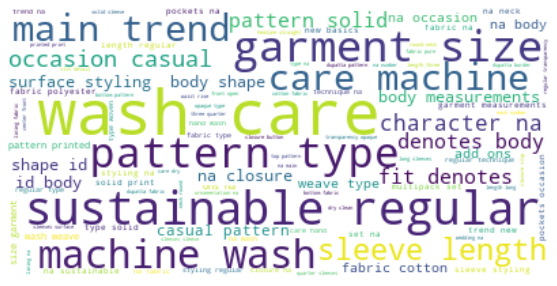

In [22]:
#The Most Used words in the attributes

text = " ".join(review for review in df.p_attributes)
print ("There are {} words in all the p_attributes.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **The most used words in the description**

There are 4048133 words in all the description.


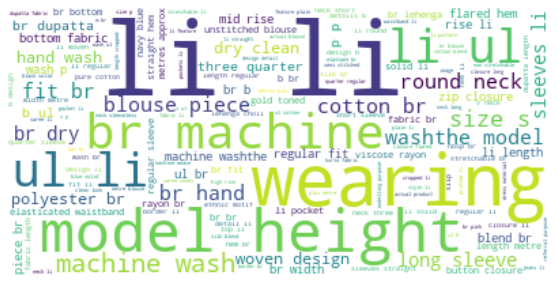

In [23]:
#The most used words in the description

text = " ".join(review for review in df.description)
print ("There are {} words in all the description.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Most rated brand

In [24]:
#Finding the Most rated brand, by descending order
rated_brand_col = pd.DataFrame(df, columns=['brand','ratingCount']) 
rated_brand=rated_brand_col.sort_values(by=['ratingCount'],ascending=False)
rated_brand

,brand,ratingCount
71,AHIKA,21274.0
53,SASSAFRAS,19656.0
290,AHIKA,16219.0
1106,Varanga,13947.0
68,Roadster,13938.0
...,...,...
1526,Allen Solly Woman,1.0
13237,Chhabra 555,1.0
6195,Oxolloxo,1.0
13533,Charukriti,1.0


# Finding the Most rated product, by descending order

In [25]:
#Finding the Most rated product, by descending order

rated_product_col = pd.DataFrame(df, columns=['name','ratingCount']) 
rated_product=rated_product_col.sort_values(by=['ratingCount'],ascending=False)
rated_product.head(20)

,name,ratingCount
71,ahika women black green printed straight kurta,21274.0
53,sassafras black high neck cropped top,19656.0
290,ahika floral print straight cotton kurta with ...,16219.0
1106,varanga mustard marigold cotton straight kurta,13947.0
68,roadster women coral pink solid hooded sweatshirt,13938.0
173,libas floral bliss side pocket cotton kurta set,12568.0
4,kotty women black wide leg high rise clean loo...,12260.0
24,athena chic fuchsia pink power shoulders top,11553.0
123,sassafras women white twill parallel trousers,10786.0
8607,anubhutee tie neck ethnic foil print kurta set,9229.0


# Finding the Most rated by color, by descending order

In [26]:
#Finding the Most rated by color, by descending order

rated_color_col = pd.DataFrame(df, columns=['colour','ratingCount']) 
rated_color=rated_color_col.sort_values(by=['ratingCount'],ascending=False)
rated_color.head(20)

,colour,ratingCount
71,Black,21274.0
53,Black,19656.0
290,Green,16219.0
1106,Yellow,13947.0
68,Coral,13938.0
173,Pink,12568.0
4,Black,12260.0
24,Fuchsia,11553.0
123,White,10786.0
8607,Red,9229.0


Top rated product by price.
Top rated product by brand.
Top rated product by color.
Products with zero rating.
Words mostly used in descrioption.
Product without description.
Which product should it focus on?

In [28]:
color=rated_color.groupby('colour').sum()
color.head()

,ratingCount
colour,
4.0,110.0
Assorted,64.0
Beige,22667.0
Black,258540.0
Blue,140148.0


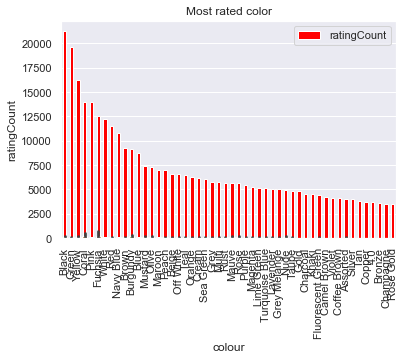

<Figure size 720x1080 with 0 Axes>

In [29]:
rated_color.plot(kind='bar', color='red',title ='Most rated color')
sns.barplot(x='colour', y='ratingCount', data=rated_color,palette='hls')
plt.figure(figsize=(10,15))
plt.show()

In [30]:
#Grouping by Colour
rated_color=rated_color.groupby('colour')['ratingCount'].sum()
rated_color

colour
4.0                     110.0
Assorted                 64.0
Beige                 22667.0
Black                258540.0
Blue                 140148.0
Bronze                   10.0
Brown                 16355.0
Burgundy              27050.0
Camel Brown             133.0
Champagne                 5.0
Charcoal               2495.0
Coffee Brown            336.0
Copper                   26.0
Coral                 15411.0
Cream                  7293.0
Fluorescent Green       570.0
Fuchsia               13345.0
Gold                   2501.0
Green                 84138.0
Grey                  26643.0
Grey Melange           1157.0
Khaki                   586.0
Lavender               4936.0
Lime Green             3602.0
Magenta                5614.0
Maroon                48609.0
Mauve                  6187.0
Multi                  8497.0
Mustard               42355.0
Navy Blue             87748.0
Nude                    650.0
Off White             23924.0
Olive                 30746.0
Ora

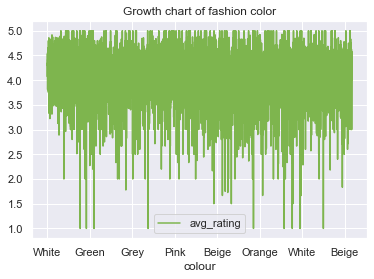

In [31]:
#this count will be used for community progress chart

#df_r=df['avg_rating'].value_counts().rename_axis('unique_dates').reset_index(name='counts')
#count_df_date

#Date,month,year and days performance growth chart
%matplotlib inline 
c='#7eb54e'
df.plot(x='colour',y='avg_rating', kind='line', color=c, title ='Growth chart of fashion color')
plt.rcParams['figure.figsize']=[50,50]

#plt.figure(figsize=(10,5))

plt.show()

# Finding the Most rated brand, by descending order less than and equal to 50 ratingcount

In [32]:
#Finding the Most rated brand, by descending order less than and equal to 50 ratingcount
rated_product_col = pd.DataFrame(df, columns=['name','ratingCount']) 
rated_product=rated_product.loc[(rated_product['ratingCount']<=50)]
rated_product

,name,ratingCount
7199,sztori women plus size dusty pink beige printe...,50.0
11411,vishudh women yellow floral embroidered regula...,50.0
11436,shae by sassafras women red regular crop top,50.0
1633,global desi women s cream coloured orange prin...,50.0
1268,dressberry women pink solid parallel trousers,50.0
...,...,...
1526,allen solly woman women blue trousers,1.0
13237,chhabra 555 fuchsia green mirror work semi sti...,1.0
6195,oxolloxo women rust brown self design open fro...,1.0
13533,charukriti green pink zari pure linen saree,1.0


In [33]:
rated_product=rated_product_col.sort_values(by=['ratingCount'],ascending=True)
rated_product

,name,ratingCount
1526,allen solly woman women blue trousers,1.0
4738,belle fille red hooded jacket,1.0
9700,belle fille women blue solid quilted jacket,1.0
11435,ethnicity women off white gold coloured woven ...,1.0
11930,baby lakshmi girls orange off white ready to w...,1.0
...,...,...
68,roadster women coral pink solid hooded sweatshirt,13938.0
1106,varanga mustard marigold cotton straight kurta,13947.0
290,ahika floral print straight cotton kurta with ...,16219.0
53,sassafras black high neck cropped top,19656.0


# Find the fashion style whose rating are between 3 and 4

In [34]:
#Find the fashion style whose rating are between 3 and 4

fashion_rating_bt_3_and_4 = df[(df.ratingCount >= 3) & (df.ratingCount<= 4)]
print('total =',len(fashion_rating_bt_3_and_4))
fashion_rating_bt_3_and_4.head()

total = 224


,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes,word_count
247,16629334.0,sangria women mustard yellow magenta printed w...,2799.0,Mustard,Sangria,3.0,4.666667,b about the brand b br sangria is a ready to w...,add ons na bottom closure slip on bottom fabri...,118
778,18088620.0,lill women navy blue white floral printed co o...,3599.0,Navy Blue,LILL,4.0,3.500000,the co ord set consists of a top amp trousers ...,add ons na bottom closure slip on bottom fabri...,41
948,18413138.0,joe hazel women black solid shrug,2495.0,Black,JoE Hazel,3.0,5.000000,black solid open front regular shrug has long ...,body or garment size garment measurements in f...,23
1008,16110306.0,juniper women green gold toned printed top wit...,4199.0,Green,Juniper,4.0,4.250000,this clothing set consists of top and palazzos...,add ons na bottom closure slip on bottom fabri...,38
1108,11842668.0,desi weavess women off white orange floral pri...,2490.0,Off White,Desi Weavess,4.0,3.000000,off white and orange printed open front longli...,body or garment size to fit denotes body measu...,26


# Find the number of fashion having rating count more than 4

In [ ]:
#Find the number of fashion having rating count more than 4.

fashion_rating_Count_more_than_4 = df[df.ratingCount > 4]
print('total =',len(fashion_rating_Count_more_than_4))
fashion_rating_Count_more_than_4.head()

# Find the number of fashion having average rating more than 4.

In [ ]:
#Find the number of fashion having average rating more than 4.

fashion_avg_rating_more_than_4 = df[df.avg_rating > 4]
print('total =',len(fashion_avg_rating_more_than_4))
fashion_avg_rating_more_than_4.head()

# Find the fashion name whose colour is black

In [ ]:
#Find the fashion name whose colour is black

fashion_black_colour = df[(df.colour =='Black')]
fashion_black_colour

In [ ]:
total_black_color=len(fashion_black_colour)

In [ ]:
print('The total fashion name whose colour is black =', total_black_color )

In [ ]:
#DISTPLOT

sns.distplot(df['ratingCount'])


In [ ]:

df['p_attributes'].unique()

In [ ]:
df['name'].unique()


In [ ]:
plt.plot([1,2,3],[4,5,6])

In [ ]:
plt.plot([1,2,3],[4,5,6], color='red')
plt.title("DEMO_Assign")
plt.ylabel('Yaxis')
plt.xlabel('Xaxis')
plt.show()

In [ ]:
plt.bar(df['price'],df['ratingCount'],color='red')